 ### Test the code that generates the linear MDP environment 

In [1]:
import numpy as np 
from lincomblock import LinCombLock, MisLinCombLock
import agent as agent 
from experiment import Run_experiment
 

num_state = 100
num_action = 5
horizon = 5
d = 10

num_epi = int(1000)
t = num_epi * horizon

      
model = LinCombLock(S=num_state, A = num_action, H = horizon, d = d)
print(model.check_prob())



(5, 100, 5, 100)
True


In [2]:
_,_,reward_random = agent.random_exp(model, num_epi)
print(reward_random[1:10])
print(reward_random[-1] / num_epi)


_, _, reward_opt = agent.optimal_agent(model, num_epi)
print(reward_opt[1:10])
print(reward_opt[-1] / num_epi)

_,_, reward_epsilon = agent.eps_greedy_exp(model, lam=1, num_epi=num_epi, eps=0.05)
print(reward_epsilon[-10:-1])
print(reward_epsilon[-1] / num_epi)

_,episode_reward0,reward_lsvi0 = agent.lsvi_ucb(model, lam=1, num_epi=num_epi, p=0.01, c = 0.001, set_beta=0.6)
print(reward_lsvi0[-10:-1])
print(reward_lsvi0[-1] / num_epi)



[0.0017858587631881598, 0.002702258987356011, 0.0034807264436940077, 0.004305088555822097, 0.005200422686110895, 0.0060749530982695974, 0.0067397231840690885, 0.00732662412075645, 0.007989617810519767]
0.0018028573505775693
[2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
0.9650158615886766
we have finished0 episodes of LSVI-eps-greedy
[780.1227380129545, 781.1227380129545, 782.1227380129545, 782.1228508902805, 783.1228508902805, 783.1229637676064, 784.1229637676064, 784.1233163704366, 784.1236040385307]
0.7851236040385308
beta in LSVI_UCB: 0.6
we have finished 0 episodes of LSVI-UCB
[943.0315494840656, 943.0321604030122, 944.0321604030122, 945.0321604030122, 946.0321604030122, 947.0321604030122, 948.0321604030122, 949.0321604030122, 950.0321604030122]
0.9510321604030122


(5, 10, 5, 10)
Trial: 1
we have finished 0 episodes of LSVI-eps-greedy
beta in LSVI_UCB: 0.3
we have finished 0 episodes of LSVI-UCB
average_reward of UCB is 0.8800697207579185
average_reward of eps_greedy is 0.7321813787991328
average_reward of optimal policy is 0.8860644308012346
Total run time: 75.21501524800001
Trial: 2
we have finished 0 episodes of LSVI-eps-greedy
beta in LSVI_UCB: 0.3
we have finished 0 episodes of LSVI-UCB
average_reward of UCB is 0.8680713539889856
average_reward of eps_greedy is 0.7211898295959206
average_reward of optimal policy is 0.8680713419836277
Total run time: 77.12991502199999
size of raw-data is (2, 5000)
file name is result_s10_a5_h5_d5_mis25.npz


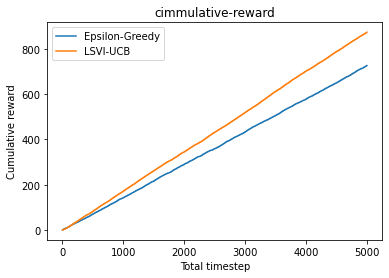

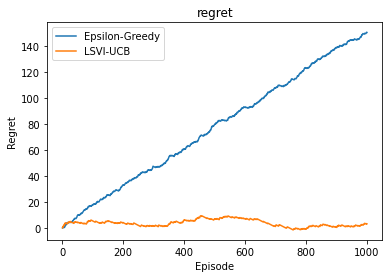

In [2]:
Run_experiment(10,5,5,5,1000,2)

Run_experiment(10,5,5,5,1000,2,0.025)
             


In [ ]:
# try misspecified model 

import timeit
import numpy as np 
from lincomblock import LinCombLock 
import agent as agent 


num_state = 100
num_action = 5
horizon = 10
d = 10
mis_prob = 0.1
num_epi = int(1000)
t = num_epi * horizon

      
model = MisLinCombLock(S=num_state, A = num_action, H = horizon, d = d, mis_prob = mis_prob)
print(model.check_prob())

start = timeit.default_timer()
_, _, reward_opt = agent.optimal_agent(model, num_epi)
print(reward_opt[1:10])
print("optimal reward", reward_opt[-1] / num_epi)

stop1 = timeit.default_timer()

print('Optimal agent Total run time:', stop1 - start)

# _,episode_reward0,reward_lsvi0 = agent.lsvi_ucb(model, lam=1, num_epi=num_epi, p=0.01, c = 0.001, set_beta=-0.2)
# print(reward_lsvi0[-10:-1])
# print(reward_lsvi0[-1] / num_epi)

stop2 = timeit.default_timer()

print('LSVI-UCB agent Total run time:', stop2 - stop1)


_,episode_reward1,reward_lsvi1 = agent.lsvi_ucb(model, lam=1, num_epi=num_epi, p=0.01, c = 0.0001, set_beta=-0.2)
print(reward_lsvi1[-10:-1])
print(reward_lsvi1[-1] / num_epi)

stop3 = timeit.default_timer()

print('LSVI-UCB agent Total run time:', stop3 - stop2)

_,episode_reward2,reward_lsvi2 = agent.lsvi_ucb(model, lam=1, num_epi=num_epi, p=0.01, c = 0.0001, set_beta=0.3)
print(reward_lsvi2[-10:-1])
print("UCB_reward, should compare with optimal", reward_lsvi2[-1] / num_epi)

stop4 = timeit.default_timer()

print('LSVI-UCB agent Total run time:', stop4 - stop3)


_,_, reward_epsilon = agent.eps_greedy_exp(model, lam=1, num_epi=num_epi, eps=0.1)
print(reward_epsilon[-10:-1])
print(reward_epsilon[-1] / num_epi)
             
stop5 = timeit.default_timer()
print('LSVI-esp-greedy agent Total run time:', stop5 - stop4)

(10, 100, 5, 100)
True
[1.000250185359698, 2.0002501853596977, 2.001313521588302, 2.0024127485361145, 3.0024127485361145, 4.0024127485361145, 5.0024127485361145, 5.003239305042112, 6.003239305042112]
optimal reward 0.572426859597871
Optimal agent Total run time: 0.5685264430001098
LSVI-UCB agent Total run time: 0.0001670219999141409
beta in LSVI_UCB: 0.041001515620179535
we have finished 0 episodes of LSVI-UCB
[587.4312579882903, 588.4312579882903, 589.4312579882903, 589.4322296372624, 590.4322296372624, 591.4322296372624, 591.4324979382759, 592.4324979382759, 593.4324979382759]
0.5944324979382759
LSVI-UCB agent Total run time: 89.48414072500009
beta in LSVI_UCB: 0.3
we have finished 0 episodes of LSVI-UCB
[563.4752534658423, 564.4752534658423, 564.4759367507023, 565.4759367507023, 566.4759367507023, 566.4766545320728, 566.4779219388081, 567.4779219388081, 567.478074155521]
UCB_reward, should compare with optimal 0.568478074155521
LSVI-UCB agent Total run time: 83.97497967899994
we hav

we have finished __ episodes of LSVI-eps-greedy 0
we have finished __ episodes of LSVI-eps-greedy 1000
[1213.0575291781083, 1213.0585798673426, 1214.0585798673426, 1215.0585798673426, 1216.0585798673426, 1217.0585798673426, 1218.0585798673426, 1218.060079446248, 1218.062182146227]
0.6095310910731135


[2.0, 3.0, 4.0, 4.001039362039408, 5.001039362039408, 6.001039362039408, 7.001039362039408, 8.001039362039407, 9.001039362039407]
0.9160858152305271
beta in LSVI_UCB: 0.2
we have finished __ episodes 0
we have finished __ episodes 200
we have finished __ episodes 400
we have finished __ episodes 600
we have finished __ episodes 800
we have finished __ episodes 1000
we have finished __ episodes 1200
we have finished __ episodes 1400
we have finished __ episodes 1600
we have finished __ episodes 1800
we have finished __ episodes 2000
we have finished __ episodes 2200
we have finished __ episodes 2400
we have finished __ episodes 2600
we have finished __ episodes 2800
we have finished __ episodes 3000
we have finished __ episodes 3200
we have finished __ episodes 3400
we have finished __ episodes 3600
we have finished __ episodes 3800
we have finished __ episodes 4000
we have finished __ episodes 4200
we have finished __ episodes 4400
we have finished __ episodes 4600
we have finished __ 

NameError: name 'reward_lsvi4' is not defined